# Check of CTHYB two-particle response functions in the non-interacting limit

for a single site hybridized with two non-interacting levels

$$ H = 
- \mu (\hat{n}_{0\uparrow} + \hat{n}_{0\downarrow}) + \sum_{\sigma=\uparrow,\downarrow} \Big[
V_1 (c^\dagger_{0,\sigma} c_{1,\sigma} + \text{h.c} ) +
V_2 (c^\dagger_{0,\sigma} c_{2,\sigma} + \text{h.c} ) +
\epsilon_1 \hat{n}_{1,\sigma} + \epsilon_2 \hat{n}_{2,\sigma}
\Big]
$$

In [13]:
%reload_ext cpp2py.magic

In [2]:
import copy
import itertools
import numpy as np

from pytriqs.gf import *
from pytriqs.archive import *
from pytriqs.operators import *
from pytriqs.statistics.histogram import *

from pytriqs.plot.mpl_interface import oplot, plt

# -- Load data from hdf5 files

class Dummy():
     def __init__(self):
        pass
    
cthyb = Dummy()
    
input_data = [
    (cthyb, 'data_cthyb.h5')]

for d, filename in input_data:
    print('--> Loading:', filename)
    with HDFArchive(filename, 'r') as h5:
        for key, value in list(h5.items()):
            setattr(d, key, value)                
    d.filename = filename

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


--> Loading: data_cthyb.h5


## System parameters

In [3]:
print('%10s | %7s' % ('parameter', 'cthyb'))
print('-'*11 + '+' + '-'*9) 
for key in sorted(list(cthyb.params.keys())):
    cthyb_val = cthyb.params[key]    
    print('%10s | %7s' % (key, cthyb_val))


 parameter |   cthyb
-----------+---------
         U |     0.0
        V1 |     2.0
        V2 |     5.0
      beta |     2.0
  epsilon1 |     0.0
  epsilon2 |     4.0
        mu |     2.0


## Single particle Green's function

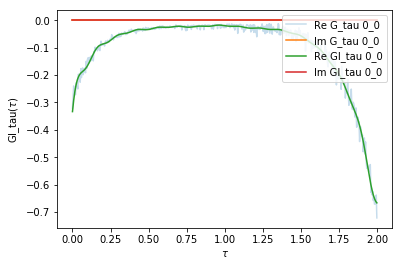

In [4]:
oplot(cthyb.G_tau, alpha=0.25)
oplot(cthyb.Gl_tau)
plt.show()

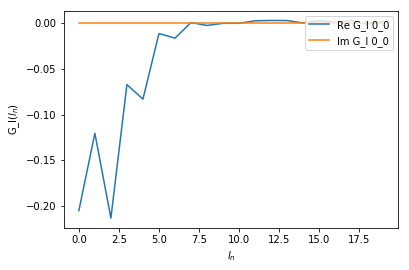

In [5]:
oplot(cthyb.G_l)
plt.show()

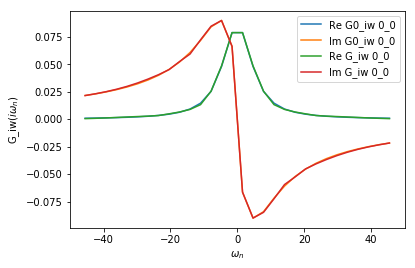

In [6]:
oplot(cthyb.G0_iw)
oplot(cthyb.G_iw)
plt.show()

## Two-particle Green's functions

In imaginary time

$$ 
G_{\bar{a}b \bar{c}d}(\tau_1, \tau_2, \tau_3) \equiv 
\langle 
c^\dagger_{\bar{a}}(\tau_1) c_{b}(\tau_2) 
c^\dagger_{\bar{c}}(\tau_3) c_{d}(0) 
\rangle
$$

and Matsubara frequency

$$
G_{\bar{a}b \bar{c}d}(i\nu_1, i\nu_2, i\nu_3) \equiv 
\langle 
c^\dagger_{\bar{a}}(i\nu_1) c_{b}(i\nu_2) 
c^\dagger_{\bar{c}}(i\nu_3) c_{d}(i\nu_4) 
\rangle \Big|_{\nu_1 + \nu_3 = \nu_2 + \nu_4}
$$

In the non-interacting limit the two-particle Green's function is a direct product of the single-particle Green's function.

$$
G_{\bar{a}b \bar{c}d}(\tau_1, \tau_2, \tau_3) =
- \langle 
c^\dagger_{\bar{a}}(\tau_1) c_{b}(\tau_2) 
c^\dagger_{\bar{c}}(\tau_3) c_{d}(0) 
\rangle
$$

In [7]:
def plot_G2_iw(G2_iw, filename, w1=20, opt={}):
    
    plt.figure(figsize=(3.25*2, 3))
    subp = [1, 2, 1]

    plt.subplot(*subp); subp[-1] += 1
    plt.title(filename + ' Re[G]')
    plt.pcolormesh( G2_iw.data[w1,:,:,0,0,0,0].real, **opt )
    plt.colorbar()
    plt.axis('equal')

    plt.subplot(*subp); subp[-1] += 1
    plt.title(filename + ' Im[G]')
    plt.pcolormesh( G2_iw.data[w1,:,:,0,0,0,0].imag, **opt )
    plt.colorbar()
    plt.axis('equal')
    
    plt.tight_layout()
    
def plot_G2_tau(G2_tau, filename, t1=15, opt={}):

    plt.figure(figsize=(3.25, 3))
    plt.title(filename)
    plt.pcolormesh( G2_tau.data[t1,:,:,0,0,0,0].real, **opt )
    plt.colorbar()
    plt.axis('equal')

    plt.tight_layout()

def get_diff_and_rel_diff(g1, g2, tol=None, rtol=None):

    diff = g1.copy()
    diff.data[:] -= g2.data
    
    if tol is not None:
        max_abs_diff = np.max(np.abs(diff.data))
        print('max|diff| =', max_abs_diff)
        assert( max_abs_diff < tol )

    rel_diff = diff.copy()
    rel_diff.data[:] /= g2.data
    rel_diff.data[:] = np.nan_to_num(rel_diff.data)

    if rtol is not None: 
        max_abs_rel_diff = np.max(np.abs(rel_diff.data))
        print('max|rel_diff| =', max_abs_rel_diff)
        assert( max_abs_rel_diff < rtol )
    
    return diff, rel_diff

# Two frequency slices

## `AllFermionic` scattering channel

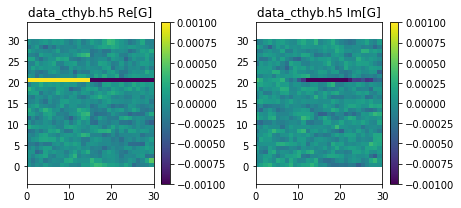

In [8]:
opt = dict(vmin=-0.001, vmax=0.001)
plot_G2_iw(cthyb.G2_iw, cthyb.filename, opt=opt)
plt.show()

## `PP` (particle-particle) channel

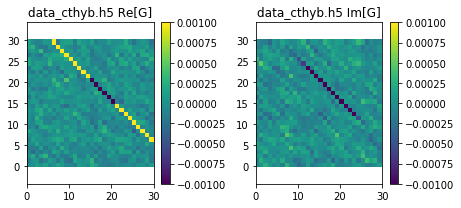

In [9]:
opt = dict(vmin=-0.001, vmax=0.001)
plot_G2_iw(cthyb.G2_iw_pp, cthyb.filename, opt=opt)
plt.show()

## `PH` (particle-hole) channel

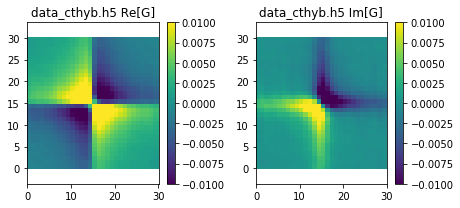

In [10]:
opt = dict(vmin=-0.01, vmax=0.01)
plot_G2_iw(cthyb.G2_iw_ph, cthyb.filename, opt=opt, w1=14)
plt.show()

## Imaginary time

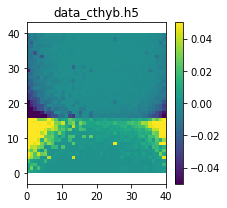

In [11]:
opt = dict(vmin=-0.05, vmax=0.05)
plot_G2_tau(cthyb.G2_tau, cthyb.filename, opt=opt)
plt.show()

# Construct disconnected two-particle Green's function



# Imagniary time

$$
G^{(0)}_{\bar{a} b \bar{c} d}(\tau_1, \tau_2, \tau_3, \tau_4=0) \equiv
G_{b\bar{a}}(\tau_2 - \tau_1) G_{d\bar{c}}(\tau_4 -\tau_3)
-
G_{d\bar{a}}(\tau_4 -\tau_1) G_{b\bar{c}}(\tau_2 - \tau_3)
$$

In [14]:
%%cpp2py -C pytriqs             

#include <triqs/gfs.hpp>
#include <triqs/clef.hpp>

using namespace triqs::gfs;
using namespace triqs::clef;

// Index placeholders

placeholder<0> a;
placeholder<1> b;
placeholder<2> c;
placeholder<3> d;
        
placeholder<4> t1;
placeholder<5> t2;
placeholder<6> t3;    
    
void disconnected_tau_G2(
    gf_view<imtime, matrix_valued> g,
    gf_view<cartesian_product<imtime, imtime, imtime>, tensor_valued<4>> g2,
    bool diag_block=false) {

    g2() = 0.0;
    const double t4 = 0.0;
    
    g2(t1, t2, t3)(a, b, c, d) << g(t2 - t1)(b, a) * g(t4 - t3)(d, c);

    // This does not compile for some reason...
    //if(diag_block)
    //  g2(t1, t2, t3)(a, b, c, d) << g2(t1, t2, t3)(a, b, c, d) - g(t4 - t1)(d, a) * g(t2 - t3)(b, c);
    
    for (auto const &t1 : std::get<0>(g2.mesh())) {
      for (auto const &t2 : std::get<1>(g2.mesh())) {
        for (auto const &t3 : std::get<2>(g2.mesh())) {
            const double t4 = 0.0;

            // replaced by oneliner above...
            //g2[closest_mesh_pt(t1, t2, t3)](a, b, c, d) << g(t2 - t1)(b, a) * g(t4 - t3)(d, c);

            if(diag_block)
              g2[closest_mesh_pt(t1, t2, t3)](a, b, c, d) << 
                g2[closest_mesh_pt(t1, t2, t3)](a, b, c, d)
                - g(t4 - t1)(d, a) * g(t2 - t3)(b, c);
        }
      }
    }
}

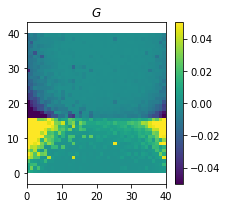

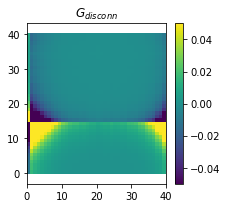

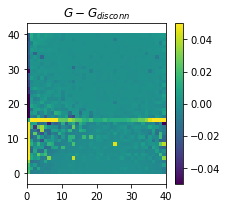

In [15]:

cthyb.G02_tau = cthyb.G2_tau.copy()
disconnected_tau_G2(cthyb.Gl_tau, cthyb.G02_tau, diag_block=False)
diff, rel_diff = get_diff_and_rel_diff(cthyb.G2_tau, cthyb.G02_tau)

opt = dict(vmin=-0.05, vmax=0.05)
plot_G2_tau(cthyb.G2_tau, '$G$', opt=opt)
plot_G2_tau(cthyb.G02_tau, '$G_{disconn}$', opt=opt)
plot_G2_tau(diff, '$G - G_{disconn}$', opt=opt)
plt.show()

# `AllFermionic`

$$
G^{(0)}_{\bar{a}b \bar{c}d} (\nu_1, \nu_2, \nu_3) =
\beta \delta_{\nu_1, \nu_2} G_{b\bar{a}}(\nu_1) G_{d\bar{c}}(\nu_3)
- \beta \delta_{\nu_2, \nu_3} G_{d\bar{a}}(\nu_1) G_{b\bar{c}}(\nu_3)
$$

In [17]:
%%cpp2py -C pytriqs             

#include <triqs/gfs.hpp>
#include <triqs/clef.hpp>

using namespace triqs::gfs;
using namespace triqs::clef;

// Index placeholders

placeholder<0> a;
placeholder<1> b;
placeholder<2> c;
placeholder<3> d;

placeholder<4> n1;
placeholder<5> n2;
placeholder<6> n3;
        
void disconnected_AllFermionic_G2(
    gf_view<imfreq, matrix_valued> g,
    gf_view<cartesian_product<imfreq, imfreq, imfreq>, tensor_valued<4>> g2,
    bool diag_block=false) {

    g2() = 0.0;
    g2(n1, n2, n3)(a, b, c, d) << kronecker(n1, n2) * g(n1)(b, a) * g(n3)(d, c);

    if(diag_block)
      g2(n1, n2, n3)(a, b, c, d) << g2(n1, n3, n3)(a, b, c, d) 
        - kronecker(n2, n3) * g(n1)(d, a) * g(n3)(b, c);
    
    g2 *= g.mesh().domain().beta;
}

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in divide


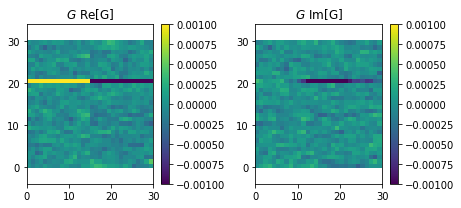

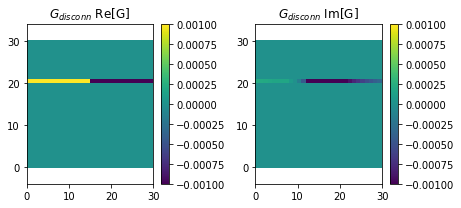

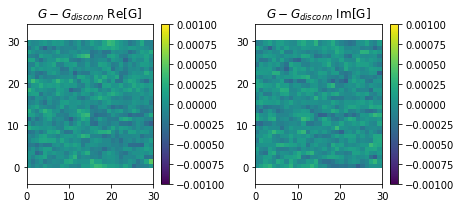

In [18]:
cthyb.G02_iw = cthyb.G2_iw.copy()
disconnected_AllFermionic_G2(cthyb.G_iw, cthyb.G02_iw, diag_block=False)
diff, rel_diff = get_diff_and_rel_diff(cthyb.G2_iw, cthyb.G02_iw)

opt = dict(vmin=-0.001, vmax=0.001)
plot_G2_iw(cthyb.G2_iw, '$G$', opt=opt)
plot_G2_iw(cthyb.G02_iw, '$G_{disconn}$', opt=opt)
plot_G2_iw(diff, '$G - G_{disconn}$', opt=opt)
plt.show()

# `PP` channel

$$
G^{pp}_{\bar{a} b \bar{c} d} (\Omega, \nu, \nu') \equiv
G_{\bar{a} b \bar{c} d} (\nu, \Omega - \nu', \Omega - \nu, \nu') 
$$

$$
G^{(0),pp}_{\bar{a} b \bar{c} d} (\Omega, \nu, \nu') \equiv
\beta \delta_{\nu + \nu', \Omega} G_{b\bar{a}}(\nu) G_{d\bar{c}}(\nu')
- \beta \delta_{\nu, \nu'} G_{d\bar{a}}(\nu) G_{b\bar{c}}(\Omega - \nu)
$$

In [19]:
%%cpp2py -C pytriqs             

#include <triqs/gfs.hpp>
#include <triqs/clef.hpp>

using namespace triqs::gfs;
using namespace triqs::clef;

// Index placeholders

placeholder<0> a;
placeholder<1> b;
placeholder<2> c;
placeholder<3> d;

placeholder<4> Omega;
placeholder<5> n;
placeholder<6> np;
        
void disconnected_PP_G2(
    gf_view<imfreq, matrix_valued> g,
    gf_view<cartesian_product<imfreq, imfreq, imfreq>, tensor_valued<4>> g2,
    bool diag_block=false) {

    g2() = 0.0;

    g2(Omega, n, np)(a, b, c, d) << kronecker(n + np, Omega) * g(n)(b, a) * g(np)(d, c);

    if(diag_block)
      g2(Omega, n, np)(a, b, c, d) << g2(Omega, n, np)(a, b, c, d) 
        - kronecker(n, np) * g(n)(d, a) * g(Omega - n)(b, c);

    g2 *= g.mesh().domain().beta;
}

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in divide


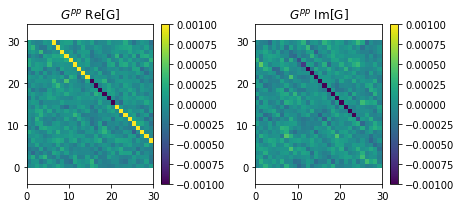

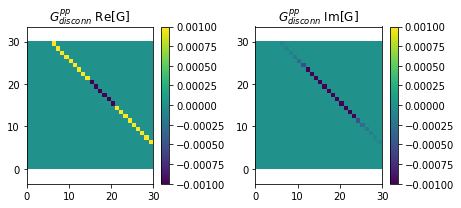

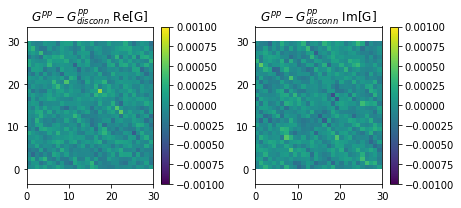

In [20]:
cthyb.G02_iw_pp = cthyb.G2_iw_pp.copy()
disconnected_PP_G2(cthyb.G_iw, cthyb.G02_iw_pp, diag_block=False)
diff, rel_diff = get_diff_and_rel_diff(cthyb.G2_iw_pp, cthyb.G02_iw_pp)

w1 = 20

opt = dict(vmin=-0.001, vmax=0.001)
plot_G2_iw(cthyb.G2_iw_pp, '$G^{pp}$', opt=opt, w1=w1)
plot_G2_iw(cthyb.G02_iw_pp, '$G^{pp}_{disconn}$', opt=opt, w1=w1)
plot_G2_iw(diff, '$G^{pp} - G^{pp}_{disconn}$', opt=opt, w1=w1)
plt.show()

# `PH` channel

$$
G^{ph}_{\bar{a} b \bar{c} d} (\Omega, \nu, \nu') \equiv
G_{\bar{a} b \bar{c} d} (\nu, \Omega + \nu, \Omega + \nu', \nu') 
$$

$$
G^{(0),ph}_{\bar{a} b \bar{c} d} (\Omega, \nu, \nu') \equiv
\beta \delta_{0, \Omega} G_{b\bar{a}}(\nu) G_{d\bar{c}}(\nu')
- \beta \delta_{\nu, \nu'} G_{d\bar{a}}(\nu) G_{b\bar{c}}(\Omega + \nu)
$$

In [21]:
%%cpp2py -C pytriqs             

#include <triqs/gfs.hpp>
#include <triqs/clef.hpp>

using namespace triqs::gfs;
using namespace triqs::clef;

// Index placeholders

placeholder<0> a;
placeholder<1> b;
placeholder<2> c;
placeholder<3> d;

placeholder<4> Omega;
placeholder<5> n;
placeholder<6> np;
        
void disconnected_PH_G2(
    gf_view<imfreq, matrix_valued> g,
    gf_view<cartesian_product<imfreq, imfreq, imfreq>, tensor_valued<4>> g2,
    bool diag_block=false) {

    g2() = 0.0;

    g2(Omega, n, np)(a, b, c, d) << kronecker(Omega) * g(n)(b, a) * g(np)(d, c);

    if(diag_block)
      g2(Omega, n, np)(a, b, c, d) << g2(Omega, n, np)(a, b, c, d) 
        - kronecker(n, np) * g(n)(d, a) * g(Omega + n)(b, c);

    g2 *= g.mesh().domain().beta;
}

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in divide


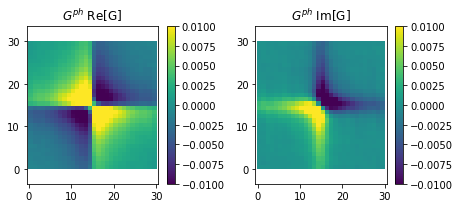

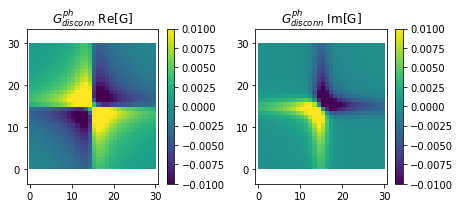

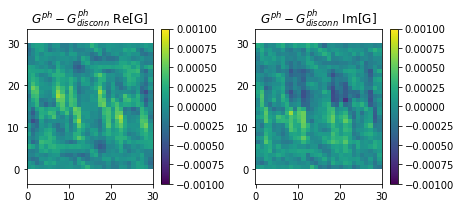

In [22]:
cthyb.G02_iw_ph = cthyb.G2_iw_ph.copy()
disconnected_PH_G2(cthyb.G_iw, cthyb.G02_iw_ph, diag_block=False)
diff, rel_diff = get_diff_and_rel_diff(cthyb.G2_iw_ph, cthyb.G02_iw_ph)

w1 = 14

opt = dict(vmin=-0.01, vmax=0.01)
plot_G2_iw(cthyb.G2_iw_ph, '$G^{ph}$', opt=opt, w1=w1)
plot_G2_iw(cthyb.G02_iw_ph, '$G^{ph}_{disconn}$', opt=opt, w1=w1)
opt = dict(vmin=-0.001, vmax=0.001)
plot_G2_iw(diff, '$G^{ph} - G^{ph}_{disconn}$', opt=opt, w1=w1)
plt.show()